## importing neede libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn
seaborn.set()

pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'Starbucks Customer Buying Behavior in U.S_November 28, 2021_01.csv')

In [4]:
df

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q1_1,Q1_2,Q1_3,Q1_4,Q2,Q3_1,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q5_NPS_GROUP,Q5,Q6_NPS_GROUP,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
0,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Please sort each brand in terms of your prefer...,Please sort each brand in terms of your prefer...,Please sort each brand in terms of your prefer...,Please sort each brand in terms of your prefer...,How often do you drink/consume Starbucks weekly?,How would you rate the overall experience of S...,Please rate each of the following factors in t...,Please rate each of the following factors in t...,Please rate each of the following factors in t...,Please rate each of the following factors in t...,Please rate each of the following factors in t...,Please rate each of the following factors in t...,Please rate each of the following factors in t...,Please rate each of the following factors in t...,How likely will you choose Starbucks for doing...,How likely will you choose Starbucks for doing...,How important are sales and promotions in your...,How important are sales and promotions in your...,Why did you choose Starbucks over other brands...,Are you aware of Starbucks loyalty program?,Does the loyalty program encourage you to patr...,Do you think what can be improve to make you m...,Will you continue buying at Starbucks?,Please indicate your age.,Please indicate your gender.,Please indicate your Identity.,What is your monthly income?
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}","{""ImportId"":""recipientFirstName""}","{""ImportId"":""recipientEmail""}","{""ImportId"":""externalDataReference""}","{""ImportId"":""locationLatitude""}","{""ImportId"":""locationLongitude""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}","{""ImportId"":""QID3_1""}","{""ImportId"":""QID3_2""}","{""ImportId"":""QID3_3""}","{""ImportId"":""QID3_4""}","{""ImportId"":""QID22""}","{""ImportId"":""QID7_1""}","{""ImportId"":""QID4_1""}","{""ImportId"":""QID4_2""}","{""ImportId"":""QID4_3""}","{""ImportId"":""QID4_4""}","{""ImportId"":""QID4_5""}","{""ImportId"":""QID4_6""}","{""ImportId"":""QID4_7""}","{""ImportId"":""QID4_8""}","{""ImportId"":""QID14_NPS_GROUP""}","{""ImportId"":""QID14""}","{""ImportId"":""QID16_NPS_GROUP""}","{""ImportId"":""QID16""}","{""ImportId"":""QID18""}","{""ImportId"":""QID24""}","{""ImportId"":""QID25""}","{""ImportId"":""QID12_TEXT""}","{""ImportId"":""QID15""}","{""ImportId"":""QID11""}","{""ImportId"":""QID13""}","{""ImportId"":""QID6""}","{""ImportId"":""QID20""}"
2,10/20/2021 0:37,10/20/2021 0:39,IP Address,100,123,TRUE,10/20/2021 0:39,R_2vcEm5K5OwLqlU6,NaN,NaN,NaN,NaN,40.7263031,-73.98179626,anonymous,EN,1,3,4,2,NaN,90,8,8,9,10,7,7,9,NaN,Passive,7,Detractor,6,NaN,NaN,NaN,Cleaning and hygiene of the venue,YES,Under 18,Male,Student,NaN
3,10/20/2021 0:40,10/20/2021 0:42,IP Address,100,83,TRUE,10/20/2021 0:42,R_2fB3i6GCcHqRC2Z,NaN,NaN,NaN,NaN,35.68870544,139.7449951,anonymous,EN,NaN,NaN,NaN,NaN,NaN,NaN,6,5,7,8,4,9,5,NaN,Detractor,1,Detractor,5,NaN,NaN,NaN,NaN,YES,Under 18,Female,Employee,NaN
4,10/20/2021 0:41,10/20/2021 0:43,IP Address,100,136,TRUE,10/20/2021 0:43,R_2Tq7SCdtQ9psUuV,NaN,NaN,NaN,NaN,22.290802,114.1500854,anonymous,EN,1,3,2,4,NaN,88,6,6,8,8,6,5,6,NaN,Detractor,6,Detractor

In [5]:
data = df[['Q1_1', 'Q1_2', 'Q1_3', 'Q1_4', 'Q2', 'Q3_1', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7',
       'Q4_8', 'Q5_NPS_GROUP', 'Q5', 'Q6_NPS_GROUP', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15']]

In [9]:
data.head()

,Q1_1,Q1_2,Q1_3,Q1_4,Q2,Q3_1,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q5_NPS_GROUP,Q5,Q6_NPS_GROUP,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
0,Please sort each brand in terms of your prefer...,Please sort each brand in terms of your prefer...,Please sort each brand in terms of your prefer...,Please sort each brand in terms of your prefer...,How often do you drink/consume Starbucks weekly?,How would you rate the overall experience of S...,Please rate each of the following factors in t...,Please rate each of the following factors in t...,Please rate each of the following factors in t...,Please rate each of the following factors in t...,Please rate each of the following factors in t...,Please rate each of the following factors in t...,Please rate each of the following factors in t...,Please rate each of the following factors in t...,How likely will you choose Starbucks for doing...,How likely will you choose Starbucks for doing...,How important are sales and promotions in your...,How important are sales and promotions in your...,Why did you choose Starbucks over other brands...,Are you aware of Starbucks loyalty program?,Does the loyalty program encourage you to patr...,Do you think what can be improve to make you m...,Will you continue buying at Starbucks?,Please indicate your age.,Please indicate your gender.,Please indicate your Identity.,What is your monthly income?
1,"{""ImportId"":""QID3_1""}","{""ImportId"":""QID3_2""}","{""ImportId"":""QID3_3""}","{""ImportId"":""QID3_4""}","{""ImportId"":""QID22""}","{""ImportId"":""QID7_1""}","{""ImportId"":""QID4_1""}","{""ImportId"":""QID4_2""}","{""ImportId"":""QID4_3""}","{""ImportId"":""QID4_4""}","{""ImportId"":""QID4_5""}","{""ImportId"":""QID4_6""}","{""ImportId"":""QID4_7""}","{""ImportId"":""QID4_8""}","{""ImportId"":""QID14_NPS_GROUP""}","{""ImportId"":""QID14""}","{""ImportId"":""QID16_NPS_GROUP""}","{""ImportId"":""QID16""}","{""ImportId"":""QID18""}","{""ImportId"":""QID24""}","{""ImportId"":""QID25""}","{""ImportId"":""QID12_TEXT""}","{""ImportId"":""QID15""}","{""ImportId"":""QID11""}","{""ImportId"":""QID13""}","{""ImportId"":""QID6""}","{""ImportId"":""QID20""}"
2,1,3,4,2,NaN,90,8,8,9,10,7,7,9,NaN,Passive,7,Detractor,6,NaN,NaN,NaN,Cleaning and hygiene of the venue,YES,Under 18,Male,Student,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,6,5,7,8,4,9,5,NaN,Detractor,1,Detractor,5,NaN,NaN,NaN,NaN,YES,Under 18,Female,Employee,NaN
4,1,3,2,4,NaN,88,6,6,8,8,6,5,6,NaN,Detractor,6,Detractor,6,NaN,NaN,NaN,Discount,YES,Under 18,Female,Student,NaN


## Lets delete first and second raw for data cleaning

In [10]:
update_df = data.drop([0,1])

In [11]:
update_df.head()

,Q1_1,Q1_2,Q1_3,Q1_4,Q2,Q3_1,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q5_NPS_GROUP,Q5,Q6_NPS_GROUP,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
2,1,3,4,2,NaN,90,8,8,9,10,7,7,9,NaN,Passive,7,Detractor,6,NaN,NaN,NaN,Cleaning and hygiene of the venue,YES,Under 18,Male,Student,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,6,5,7,8,4,9,5,NaN,Detractor,1,Detractor,5,NaN,NaN,NaN,NaN,YES,Under 18,Female,Employee,NaN
4,1,3,2,4,NaN,88,6,6,8,8,6,5,6,NaN,Detractor,6,Detractor,6,NaN,NaN,NaN,Discount,YES,Under 18,Female,Student,NaN
5,1,3,4,2,NaN,100,8,7,10,10,8,9,10,NaN,Detractor,6,Detractor,5,NaN,NaN,NaN,NaN,YES,Under 18,Male,Employee,NaN
6,NaN,NaN,NaN,NaN,NaN,87,6,6,9,8,3,5,4,NaN,Detractor,6,Detractor,6,NaN,NaN,NaN,NaN,YES,Under 18,Female,Employee,NaN


In [12]:
update_df.describe()

,Q1_1,Q1_2,Q1_3,Q1_4,Q2,Q3_1,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q5_NPS_GROUP,Q5,Q6_NPS_GROUP,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
count,37,37,37,37,23,40,54,54,54,54,54,54,53,23,52,52,52,52,23,23,16,26,53,56,56,56,23
unique,4,4,4,4,3,23,9,8,9,7,10,9,9,7,3,8,3,9,19,2,2,23,2,3,3,3,4
top,1,3,4,4,Less than 3,80,8,8,8,8,5,5,8,8,Detractor,6,Detractor,6,Convenient location to study/work,No,Yes,lower price,YES,Under 18,Female,Student,Under $1000
freq,27,20,18,13,19,5,15,16,15,18,11,11,13,8,28,14,32,12,2,12,9,3,47,27,39,33,11


## Gender distribution in our data

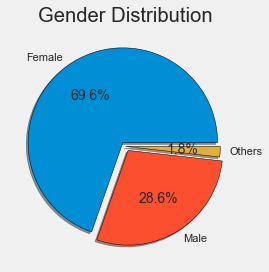

In [14]:
s = update_df['Q13'].value_counts()[:]

plt.style.use("fivethirtyeight")

colors=['blue','red','yello']
explode= [0.05,0.05,0]
plt.pie(s, labels = s.index, explode = explode, startangle=0,autopct='%1.1f%%', shadow = True, wedgeprops = { 'edgecolor' : 'black' } )

plt.title("Gender Distribution")

plt.tight_layout()

plt.show()

## Gender insights (survey)
* in this starbucks survey ratio of Male:Female is 30:70 where in real world starbucks customer gender ratio is 50:35
* we have a very approx 2 percent of people who don't want to reveal their gender in the survey

## How would you rate the overall experience of Starbucks compared to other brands?(Coffee Bean, Service, Ambience, Wifi, etc..) - I love Starbucks

In [15]:
update_df['Q3_1'].values

array(['90', nan, '88', '100', '87', '50', '100', '83', '75', '80', '90',
       '25', nan, '80', '100', nan, '50', '50', '50', nan, nan, '70',
       '80', nan, '72', '80', '68', '60', '84', nan, '42', '88', nan,
       '60', nan, '70', nan, nan, nan, '100', '72', nan, '92', '79', '79',
       '54', nan, nan, '80', '82', '81', nan, '30', nan, nan, '85', '71',
       '70'], dtype=object)

In [16]:
update_df['Q3_1'] = update_df['Q3_1'].astype(float)

In [17]:
Q3_1_mean = update_df['Q3_1'].mean()

In [18]:
update_df['Q3_1'] = update_df['Q3_1'].fillna(update_df['Q3_1'].mean())

In [19]:
update_df['Q3_1'].values

array([ 90.   ,  73.675,  88.   , 100.   ,  87.   ,  50.   , 100.   ,
        83.   ,  75.   ,  80.   ,  90.   ,  25.   ,  73.675,  80.   ,
       100.   ,  73.675,  50.   ,  50.   ,  50.   ,  73.675,  73.675,
        70.   ,  80.   ,  73.675,  72.   ,  80.   ,  68.   ,  60.   ,
        84.   ,  73.675,  42.   ,  88.   ,  73.675,  60.   ,  73.675,
        70.   ,  73.675,  73.675,  73.675, 100.   ,  72.   ,  73.675,
        92.   ,  79.   ,  79.   ,  54.   ,  73.675,  73.675,  80.   ,
        82.   ,  81.   ,  73.675,  30.   ,  73.675,  73.675,  85.   ,
        71.   ,  70.   ])

In [20]:
colors = sns.color_palette('pastel')[0:5]

In [21]:
update_df['Q13'] = update_df['Q13'].fillna(update_df['Q13'].mode())

In [22]:
num = update_df['Q3_1'].to_list()

In [23]:
len(num)

58

In [24]:
count = 0
for x in num:
    if x< 40:
        count+=1
count

2

<AxesSubplot:xlabel='Experience of starbucks on a scale of (0-100)', ylabel='Count'>

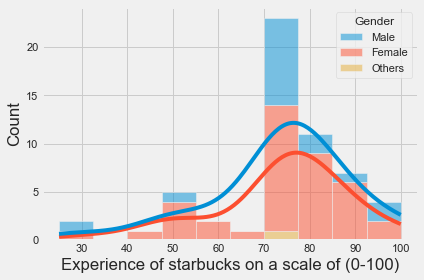

In [25]:
sns.histplot(data=update_df['Q3_1'], x=update_df['Q3_1'].rename('Experience of starbucks on a scale of (0-100)'),
             bins=10, kde=True, hue=update_df['Q13'].rename('Gender'),multiple="stack")

* above figure shows the overall experience in starbucks is quite good.
* out of 58 customers 44 gave experience rating above 70.
* and there is only 2 customers who gave rating below 40.

## How often do you drink/consume Starbucks weekly?

In [26]:
update_df['Q2'].value_counts()

Less than 3    19
3 to 7          3
7 to 10         1
Name: Q2, dtype: int64

In [27]:
categories = ['Less than 3 times','3 to 7 times','7 to 10 times']
counts = [19,3,1]

<AxesSubplot:>

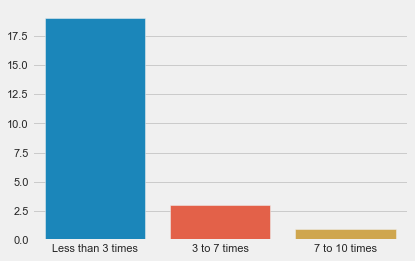

In [28]:
# sns.histplot(x=categories, y=counts)
sns.barplot(x=categories, y=counts)

* you can see clearly people consume starbucks few times in a week.
* out of 23, 19 customers consume less than 3 times(one of the factor is pricing of the product).
* out of all only 1 customer consume 7 to 10 times in a week.

In [29]:
update_df.shape

(58, 27)

In [30]:
satisfaction_scale = update_df[['Q4_1','Q4_2','Q4_3','Q4_4','Q4_5','Q4_6','Q4_7','Q4_7']]

In [31]:
satisfaction_scale = satisfaction_scale.rename(columns={'Q4_1': 'service', 'Q4_2': 'taste_and_flavour','Q4_3':'brand_Reputation','Q4_4':'location',
                                                       'Q4_5':'price','Q4_6':'ambience','Q4_7':'wifi_quality'})

In [32]:
satisfaction_scale.head()

,service,taste_and_flavour,brand_Reputation,location,price,ambience,wifi_quality,wifi_quality
2,8,8,9,10,7,7,9,9
3,6,5,7,8,4,9,5,5
4,6,6,8,8,6,5,6,6
5,8,7,10,10,8,9,10,10
6,6,6,9,8,3,5,4,4


In [33]:
satisfaction_scale = satisfaction_scale.dropna()

In [34]:
satisfaction_scale = satisfaction_scale.iloc[:,:-1]

In [35]:
satisfaction_scale.head()

,service,taste_and_flavour,brand_Reputation,location,price,ambience,wifi_quality
2,8,8,9,10,7,7,9
3,6,5,7,8,4,9,5
4,6,6,8,8,6,5,6
5,8,7,10,10,8,9,10
6,6,6,9,8,3,5,4


In [36]:
satisfaction_scale.describe()

,service,taste_and_flavour,brand_Reputation,location,price,ambience,wifi_quality
count,53,53,53,53,53,53,53
unique,9,8,9,7,10,9,9
top,8,8,8,8,5,5,8
freq,15,16,15,18,11,11,13


In [37]:
satisfaction_scale.mean().mean()

2.959270574153929e+62

In [38]:
satisfaction_scale = satisfaction_scale.astype(int)

<AxesSubplot:xlabel='service of starbucks on a scale of (0-10)', ylabel='Count'>

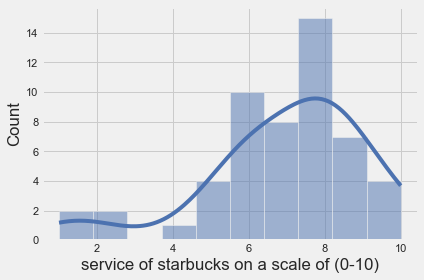

In [39]:
sns.histplot(data=satisfaction_scale['service'].values.sort(), x=satisfaction_scale['service'].rename('service of starbucks on a scale of (0-10)'),
             bins=10, kde=True,multiple="stack")

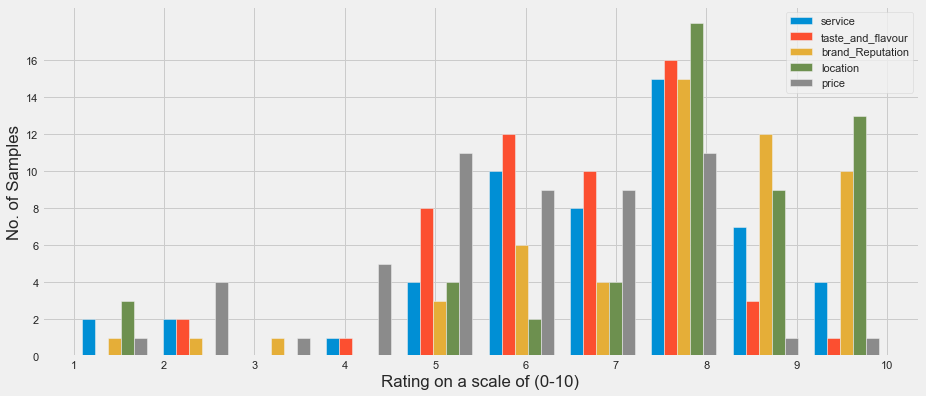

In [40]:
dim1=np.arange(1,11,1)
dim2=np.arange(0,18,2)
plt.figure(figsize=(14,6))
plt.hist([satisfaction_scale['service'],satisfaction_scale['taste_and_flavour'],satisfaction_scale['brand_Reputation'],
         satisfaction_scale['location'],satisfaction_scale['price']], 
         label=['service','taste_and_flavour','brand_Reputation','location','price'])
plt.legend()
plt.xticks(dim1)
plt.yticks(dim2)
plt.xlabel('Rating on a scale of (0-10)')
plt.ylabel('No. of Samples')
plt.show()

## rating of various experiene at the starbucks
--------------------------------------------------------------
* over all rating of starbucks experience is average to above-average 
* amazing thing is that among all the experience starbuck's location experience is on the top
* in term of brand reputation starbucks is way ahead of their competition and in survey also customers rate highly.
* pricing is quite overwhelming at starbucks and in above plot customer gave rating between 5 to 8 more oftenly
* in taste and flavour starbucks getting fabulous average rating of approx 7.

## Average Ratings of starbuck experiences
---------------------------------------------------------------
0. over all exeperience at starbucks is 6.9 out of 10
1. starbuck's services => 7 out of 10
2. starbuck's taste and flavour => 6.7 out of 10
3. starbuck's brand reputation => 7.8 out of 10
4. starbuck's location => 7.9 out of 10
5. starbuck's price => 5.9 out of 10
6. starbuck's ambience => 6.6 out of 10
7. starbuck's wifi_quality => 6.5 out of 10


In [41]:
update_df.columns

Index(['Q1_1', 'Q1_2', 'Q1_3', 'Q1_4', 'Q2', 'Q3_1', 'Q4_1', 'Q4_2', 'Q4_3',
       'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q4_8', 'Q5_NPS_GROUP', 'Q5',
       'Q6_NPS_GROUP', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15'],
      dtype='object')

## How likely you choose starbucks for meeting or hang-out with friends

In [42]:
starbucks_meeting = update_df['Q5_NPS_GROUP'].dropna()

In [43]:
starbucks_meeting.shape

(52,)

Text(0.5, 0, 'No of instances')

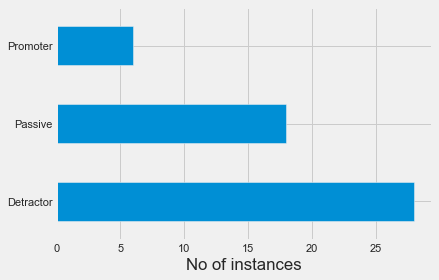

In [44]:
starbucks_meeting.value_counts().plot(kind="barh")
plt.xlabel("No of instances")

### rating out of 10

In [45]:
update_df['Q5'].shape

(58,)

In [46]:
starbucks_meeting_rating = update_df['Q5'].dropna()

In [47]:
starbucks_meeting_rating = starbucks_meeting_rating.values.astype(int)

In [48]:
starbucks_meeting_rating

array([ 7,  1,  6,  6,  6,  7, 10,  7,  8,  8,  6,  6,  6, 10,  6,  3,  5,
        5,  5,  5,  8,  8,  6,  5,  5,  9,  5,  8,  7, 10,  5,  7,  6,  9,
        6,  8,  7,  9,  5,  1,  5,  8,  8,  8,  6,  7,  3,  6,  6,  7,  6,
        8])

Text(0, 0.5, 'no of instance')

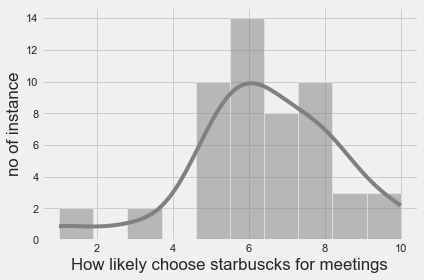

In [49]:
sns.histplot(data=starbucks_meeting_rating,bins=10, kde=True,multiple="stack",color='gray')
plt.xlabel("How likely choose starbuscks for meetings")
plt.ylabel("no of instance")

* there is storng evidence that starbucks is very likely to be choosen for meetings.
* you can see cluster between 5 to 8 ratings.

## will you continue buying at starbucks?

In [50]:
continue_or_not = update_df['Q11']

In [51]:
continue_or_not = continue_or_not.dropna()

In [52]:
pd_continue = continue_or_not.value_counts().to_frame("count")

In [53]:
47/53

0.8867924528301887

<AxesSubplot:>

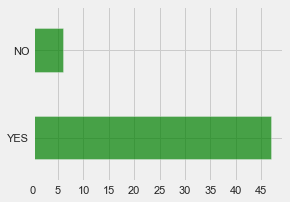

In [54]:
plt.figure(figsize=(4,3))
dim1=np.arange(0,50,5)
plt.xticks(dim1)
continue_or_not.value_counts().plot(kind='barh',alpha=0.7,color='green')

* in survey results clearly shows that almost 90% people will continue buying at starbucks.
* so we can say that starbucks know how to retained their customers more than any of their competitors.
* only 10 percent of custmores shows disagreement.

## Age of costumers

In [55]:
age_consumer = update_df['Q12'].dropna()

Text(0, 0.5, 'No of instances')

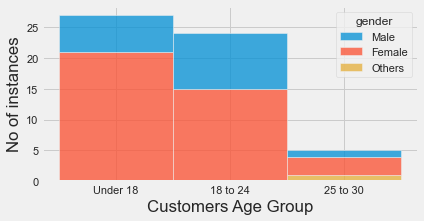

In [56]:
plt.figure(figsize=(6,3))
sns.histplot(data=age_consumer, x=age_consumer,
             kde=False, hue=update_df['Q13'].dropna().rename('gender'),multiple="stack")
plt.xlabel('Customers Age Group')
plt.ylabel('No of instances')

* in our survey we found that majority of their consumers are below age of 24.
* so have a very clear idea about our target age group or target audience.
* starbucks should come up with some kind of endorsement and their target audience should be younger generation(below 24).

## Occupation of customers

In [57]:
occupation = update_df['Q14']

In [58]:
occupation = occupation.dropna()

In [59]:
occupation.value_counts()

Student     33
Employee    22
Other        1
Name: Q14, dtype: int64

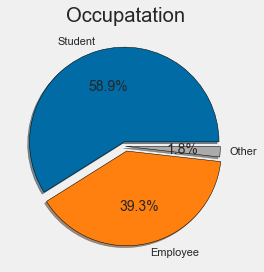

In [60]:
plt.figure(figsize=(6,4))
s = occupation.value_counts()[:]

plt.style.use("tableau-colorblind10")

explode= [0.05,0.05,0]
plt.pie(s, labels = s.index, explode = explode, startangle=0,autopct='%1.1f%%', shadow = True, wedgeprops = { 'edgecolor' : 'black' } )

plt.title("Occupatation")

plt.tight_layout()

plt.show()

* after this analysis we are very clear about our target audience as can see almost 60 percent of consumers are students.
* and approx 40 percent of total are employees.
* if starbucks want to come up with some kind of campaign their target audience shouble be student and more specific age between 18 and 24

## Monthly income of Starbucks Customers

In [61]:
income = update_df['Q15']

In [62]:
income = income.dropna()

Text(0, 0.5, 'No. of Customers')

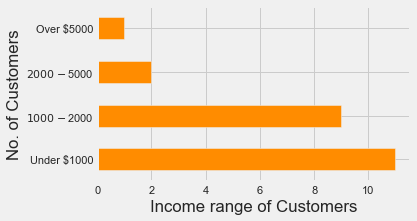

In [63]:
plt.figure(figsize=(5,3))
income.value_counts().plot(kind='barh',color='darkorange')
plt.xlabel('Income range of Customers')
plt.ylabel('No. of Customers')

* study shows that people spend more money at starbucks whose income is below 1000 dollars as compare to people with relatively higher income.

## let's do PCA and model building 

In [64]:
update_df.head()

,Q1_1,Q1_2,Q1_3,Q1_4,Q2,Q3_1,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q5_NPS_GROUP,Q5,Q6_NPS_GROUP,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
2,1,3,4,2,NaN,90.000,8,8,9,10,7,7,9,NaN,Passive,7,Detractor,6,NaN,NaN,NaN,Cleaning and hygiene of the venue,YES,Under 18,Male,Student,NaN
3,NaN,NaN,NaN,NaN,NaN,73.675,6,5,7,8,4,9,5,NaN,Detractor,1,Detractor,5,NaN,NaN,NaN,NaN,YES,Under 18,Female,Employee,NaN
4,1,3,2,4,NaN,88.000,6,6,8,8,6,5,6,NaN,Detractor,6,Detractor,6,NaN,NaN,NaN,Discount,YES,Under 18,Female,Student,NaN
5,1,3,4,2,NaN,100.000,8,7,10,10,8,9,10,NaN,Detractor,6,Detractor,5,NaN,NaN,NaN,NaN,YES,Under 18,Male,Employee,NaN
6,NaN,NaN,NaN,NaN,NaN,87.000,6,6,9,8,3,5,4,NaN,Detractor,6,Detractor,6,NaN,NaN,NaN,NaN,YES,Under 18,Female,Employee,NaN


In [65]:
modeling_df = update_df[["Q1_1","Q1_2","Q1_3","Q1_4","Q3_1","Q4_1","Q4_2","Q4_3","Q4_4","Q4_5","Q4_6","Q4_7",
                        "Q5","Q6","Q12","Q13","Q14","Q5_NPS_GROUP","Q6_NPS_GROUP","Q11"]]

In [66]:
modeling_df.head()

,Q1_1,Q1_2,Q1_3,Q1_4,Q3_1,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q5,Q6,Q12,Q13,Q14,Q5_NPS_GROUP,Q6_NPS_GROUP,Q11
2,1,3,4,2,90.000,8,8,9,10,7,7,9,7,6,Under 18,Male,Student,Passive,Detractor,YES
3,NaN,NaN,NaN,NaN,73.675,6,5,7,8,4,9,5,1,5,Under 18,Female,Employee,Detractor,Detractor,YES
4,1,3,2,4,88.000,6,6,8,8,6,5,6,6,6,Under 18,Female,Student,Detractor,Detractor,YES
5,1,3,4,2,100.000,8,7,10,10,8,9,10,6,5,Under 18,Male,Employee,Detractor,Detractor,YES
6,NaN,NaN,NaN,NaN,87.000,6,6,9,8,3,5,4,6,6,Under 18,Female,Employee,Detractor,Detractor,YES


In [70]:
numeric_cols = ["Q1_1","Q1_2","Q1_3","Q1_4","Q3_1","Q4_1","Q4_2","Q4_3","Q4_4","Q4_5","Q4_6","Q4_7","Q5","Q6"]

In [71]:
for col in numeric_cols:
    modeling_df[col] = modeling_df[col].astype(float)

In [73]:
# modeling_df.info()

## Let's fill the null values using mean for numeric data and mode for categorical data

In [74]:
for col in numeric_cols:
    mean = modeling_df[col].mean()
    modeling_df[col] = modeling_df[col].fillna(mean)

In [75]:
categorical_df = ["Q12","Q13","Q14","Q5_NPS_GROUP","Q6_NPS_GROUP","Q11"]

In [76]:
for col in categorical_df:
    mode_ = modeling_df[col].mode(dropna=False)[0]
    modeling_df[col] = modeling_df[col].fillna(mode_)

In [77]:
modeling_df.isnull().sum()

Q1_1            0
Q1_2            0
Q1_3            0
Q1_4            0
Q3_1            0
Q4_1            0
Q4_2            0
Q4_3            0
Q4_4            0
Q4_5            0
Q4_6            0
Q4_7            0
Q5              0
Q6              0
Q12             0
Q13             0
Q14             0
Q5_NPS_GROUP    0
Q6_NPS_GROUP    0
Q11             0
dtype: int64

In [78]:
modeling_df.head()

,Q1_1,Q1_2,Q1_3,Q1_4,Q3_1,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q5,Q6,Q12,Q13,Q14,Q5_NPS_GROUP,Q6_NPS_GROUP,Q11
2,1.000000,3.000000,4.000000,2.00000,90.000,8.0,8.0,9.0,10.0,7.0,7.0,9.0,7.0,6.0,Under 18,Male,Student,Passive,Detractor,YES
3,1.378378,2.756757,3.135135,2.72973,73.675,6.0,5.0,7.0,8.0,4.0,9.0,5.0,1.0,5.0,Under 18,Female,Employee,Detractor,Detractor,YES
4,1.000000,3.000000,2.000000,4.00000,88.000,6.0,6.0,8.0,8.0,6.0,5.0,6.0,6.0,6.0,Under 18,Female,Student,Detractor,Detractor,YES
5,1.000000,3.000000,4.000000,2.00000,100.000,8.0,7.0,10.0,10.0,8.0,9.0,10.0,6.0,5.0,Under 18,Male,Employee,Detractor,Detractor,YES
6,1.378378,2.756757,3.135135,2.72973,87.000,6.0,6.0,9.0,8.0,3.0,5.0,4.0,6.0,6.0,Under 18,Female,Employee,Detractor,Detractor,YES


### Consider hypohesis -> overall experience of Starbucks compared to other brands would be more than 50

In [79]:
rate_mean=statistics.mean(modeling_df.Q3_1)
print(rate_mean)

73.675


In [80]:
from scipy.stats import ttest_1samp
tset, pval = ttest_1samp(modeling_df.Q3_1, 50)
print("pvalue",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we are fail to reject null hypothesis")

pvalue 6.119400621761669e-17
we are rejecting null hypothesis


## Now we have a clean and non-none data

### Let's convert categorical data into numeric data

In [81]:
main_df = modeling_df.copy()

In [82]:
categorical_data = main_df[categorical_df]

In [83]:
categorical_data.head()

,Q12,Q13,Q14,Q5_NPS_GROUP,Q6_NPS_GROUP,Q11
2,Under 18,Male,Student,Passive,Detractor,YES
3,Under 18,Female,Employee,Detractor,Detractor,YES
4,Under 18,Female,Student,Detractor,Detractor,YES
5,Under 18,Male,Employee,Detractor,Detractor,YES
6,Under 18,Female,Employee,Detractor,Detractor,YES


In [84]:
categorical_data = pd.get_dummies(categorical_data,drop_first=True)

In [85]:
categorical_data.head()

,Q12_25 to 30,Q12_Under 18,Q13_Male,Q13_Others,Q14_Other,Q14_Student,Q5_NPS_GROUP_Passive,Q5_NPS_GROUP_Promoter,Q6_NPS_GROUP_Passive,Q6_NPS_GROUP_Promoter,Q11_YES
2,0,1,1,0,0,1,1,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,1


## Let's remove categorical data from main dataframe and add this numeric conversion dataframe for training

In [86]:
main_df = main_df.drop(['Q12','Q13','Q14','Q5_NPS_GROUP','Q6_NPS_GROUP','Q11'],axis=1)

In [87]:
final_df = pd.concat([main_df, categorical_data], axis=1)

In [88]:
final_df.head()

,Q1_1,Q1_2,Q1_3,Q1_4,Q3_1,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q5,Q6,Q12_25 to 30,Q12_Under 18,Q13_Male,Q13_Others,Q14_Other,Q14_Student,Q5_NPS_GROUP_Passive,Q5_NPS_GROUP_Promoter,Q6_NPS_GROUP_Passive,Q6_NPS_GROUP_Promoter,Q11_YES
2,1.000000,3.000000,4.000000,2.00000,90.000,8.0,8.0,9.0,10.0,7.0,7.0,9.0,7.0,6.0,0,1,1,0,0,1,1,0,0,0,1
3,1.378378,2.756757,3.135135,2.72973,73.675,6.0,5.0,7.0,8.0,4.0,9.0,5.0,1.0,5.0,0,1,0,0,0,0,0,0,0,0,1
4,1.000000,3.000000,2.000000,4.00000,88.000,6.0,6.0,8.0,8.0,6.0,5.0,6.0,6.0,6.0,0,1,0,0,0,1,0,0,0,0,1
5,1.000000,3.000000,4.000000,2.00000,100.000,8.0,7.0,10.0,10.0,8.0,9.0,10.0,6.0,5.0,0,1,1,0,0,0,0,0,0,0,1
6,1.378378,2.756757,3.135135,2.72973,87.000,6.0,6.0,9.0,8.0,3.0,5.0,4.0,6.0,6.0,0,1,0,0,0,0,0,0,0,0,1


In [89]:
final_df['Q11_YES'].value_counts()

1    52
0     6
Name: Q11_YES, dtype: int64